In [1]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge  # Example estimator
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from pyperch.neural.backprop_nn import BackpropModule
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from torch import nn, optim
from skorch import NeuralNetClassifier




Note: you may need to restart the kernel to use updated packages.


##Download both the datasets and Preprocess
#Missing Data Found in Bmarketing| Added One Hot Encoding and padded missing data

In [2]:
bank_marketing = pd.read_csv('/workspaces/7641HW1/data/BankMarketingData.csv')
breast_cancer = fetch_ucirepo(id=17)
X2 = pd.DataFrame(breast_cancer.data.features, columns=breast_cancer.feature_names)
y2 = pd.DataFrame(breast_cancer.data.targets)
dataset_2 = pd.concat([X2, y2], axis=1)
scaler = StandardScaler()
num_var =  ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3']
dataset_2[num_var] = scaler.fit_transform(dataset_2[num_var])
#print(y2.value_counts())
dataset_2['Diagnosis'] = dataset_2['Diagnosis'].replace({'M': 1, 'B': 0}).astype('category')
cols = list(dataset_2.columns)
cols.insert(0, cols.pop(cols.index('Diagnosis')))
dataset_2 = dataset_2[cols]

#bankmarketing preprocessing
bank_marketing['y'] = bank_marketing['y'].replace({'yes': 1, 'no': 0}).astype('category')
bank_marketing = bank_marketing.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.replace('unknown', x.mode()[0]).fillna(x.mode()[0]))
bank_marketing['previous_contact'] = bank_marketing['pdays'].apply(lambda x: False if x == 999 else True)
numerical_cols = bank_marketing.select_dtypes(include=['number']).columns.tolist()
bank_marketing[numerical_cols]=scaler.fit_transform(bank_marketing[numerical_cols])
categorical_cols = bank_marketing.select_dtypes(include=['object']).columns.tolist()
X1_encoded = pd.get_dummies(bank_marketing, columns=categorical_cols)
bank_marketing = X1_encoded
cols = list(bank_marketing.columns)
cols.insert(0, cols.pop(cols.index('y')))
bank_marketing = bank_marketing[cols]
# Last_Column = bank_marketing.iloc[:, -1]  # This selects the last column
# y1 = pd.DataFrame(Last_Column)
# Last_Column = bank_marketing.iloc[:, -1] 
# y1 = pd.DataFrame(Last_Column)
# y1['y'] = y1['y'].replace({'yes': 1, 'no': 0})
# all_except_last = bank_marketing.iloc[:, :-1]  # This selects all columns except the last one
# # Step 3: Create a new DataFrame with the selected columns
# X1 = pd.DataFrame(all_except_last)
#bank_marketing['previous_contact'] = bank_marketing['pdays'].apply(lambda x: False if x == 999 else True)
# categorical_cols = X1.select_dtypes(include=['object', 'category']).columns.tolist()
# numerical_cols = X1.select_dtypes(include=['number']).columns.tolist()
# X1[numerical_cols]=scaler.fit_transform(X1[numerical_cols])
# X1 = X1.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' 
#                      else x.replace('unknown', x.mode()[0]).fillna(x.mode()[0]))
# X1_encoded = pd.get_dummies(X1, categorical_cols)
# X1 = X1_encoded

##Helper Functions for 
 Loading the Data,
 Running the Models,
 Showcasing the Results

In [3]:
def loading_data():
    X1 = np.array(bank_marketing.values[:,1:-1].astype(np.float32))
    y1 = np.array(bank_marketing.values[:,0].ravel().astype(np.int64))
    X2 = np.array(dataset_2.values[:,1:-1].astype(np.float32))
    y2 = np.array(dataset_2.values[:,0].ravel().astype(np.int64))
    return X1,y1,X2,y2

Start the ML Code

In [4]:
bmX,bmY, cX,cY = loading_data()

Hidden Units

Iteration 1, loss = 0.26870209
Iteration 2, loss = 0.20692049
Iteration 3, loss = 0.20715490
Iteration 4, loss = 0.20741329
Iteration 5, loss = 0.20641935
Iteration 6, loss = 0.20857149
Iteration 7, loss = 0.20688681
Iteration 8, loss = 0.20513755
Iteration 9, loss = 0.20585028
Iteration 10, loss = 0.20718578
Iteration 11, loss = 0.20679150
Iteration 12, loss = 0.20657803
Iteration 13, loss = 0.20614115
Iteration 14, loss = 0.20553014
Iteration 15, loss = 0.20706410
Iteration 16, loss = 0.20582157
Iteration 17, loss = 0.20692044
Iteration 18, loss = 0.20531910
Iteration 19, loss = 0.20619770
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.20873942
Iteration 2, loss = 0.19012359
Iteration 3, loss = 0.18820086
Iteration 4, loss = 0.18751068
Iteration 5, loss = 0.18690948
Iteration 6, loss = 0.18602959
Iteration 7, loss = 0.18533790
Iteration 8, loss = 0.18469219
Iteration 9, loss = 0.18575033
Iteration 10, loss = 0.18400744


Iteration 12, loss = 0.18054742
Iteration 13, loss = 0.18128962
Iteration 14, loss = 0.18083066
Iteration 15, loss = 0.18031823
Iteration 16, loss = 0.17988211
Iteration 17, loss = 0.17978730
Iteration 18, loss = 0.17917705
Iteration 19, loss = 0.17970769
Iteration 20, loss = 0.17868953
Iteration 21, loss = 0.17884148
Iteration 22, loss = 0.17950508
Iteration 23, loss = 0.18069036
Iteration 24, loss = 0.17880562
Iteration 25, loss = 0.17935886
Iteration 26, loss = 0.17894915
Iteration 27, loss = 0.17981978
Iteration 28, loss = 0.17953894
Iteration 29, loss = 0.17859087
Iteration 30, loss = 0.17964196
Iteration 31, loss = 0.17953813
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.20646354
Iteration 2, loss = 0.18672691
Iteration 3, loss = 0.18598174
Iteration 4, loss = 0.18714930
Iteration 5, loss = 0.18402559
Iteration 6, loss = 0.18396020
Iteration 7, loss = 0.18608593
Iteration 8, loss = 0.18459151
Iteration 9, loss = 0.

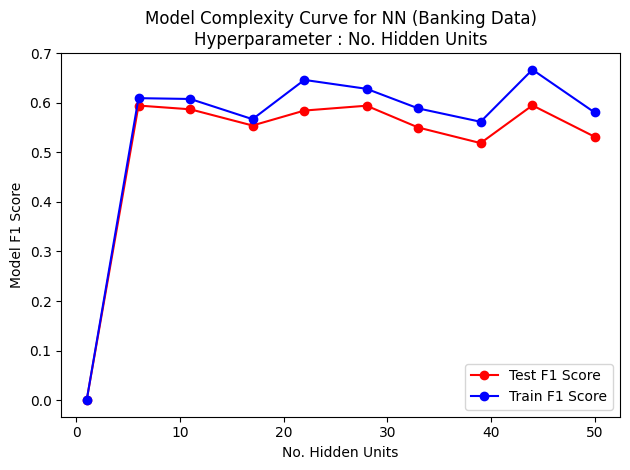

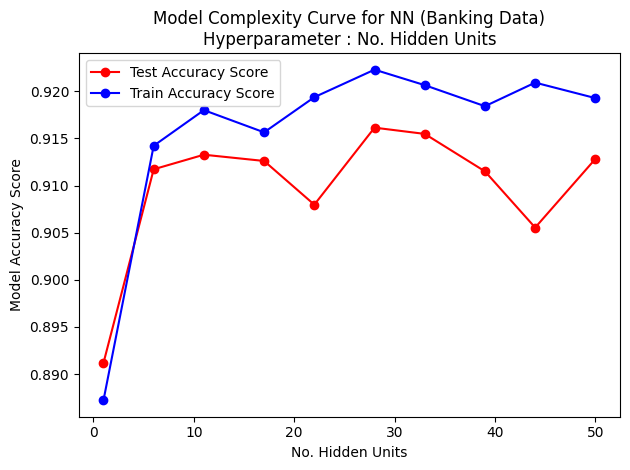

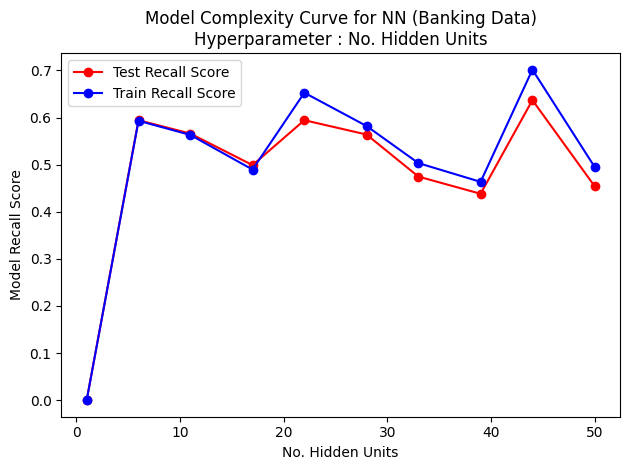

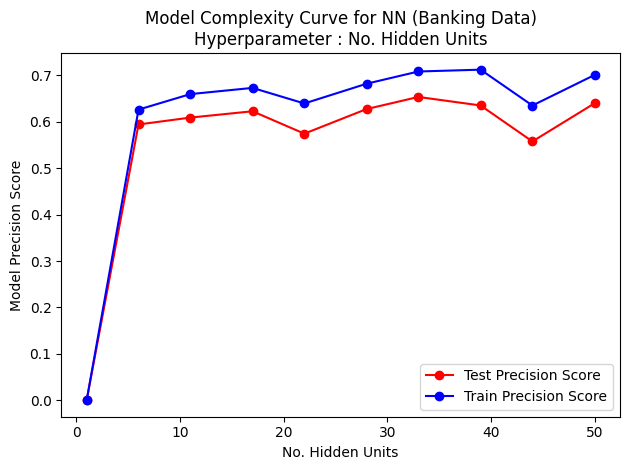

In [5]:
#BM
Xtrain,Xtest,ytrain,ytest = train_test_split(bmX,bmY,test_size=.10,random_state=25)
f1_test = []
f1_train = []
accuracy_test = []
accuracy_train = []
precision_test = []
precision_train = []
recall_test = []
recall_train = []

hlist = np.linspace(1,50,10).astype('int')
for i in hlist:
        
        mlp = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='logistic', 
                                learning_rate_init=0.1, max_iter=300, random_state=25,verbose=True)
        mlp.fit(Xtrain, ytrain)
        ypredtest = mlp.predict(Xtest)
        ypredtrain = mlp.predict(Xtrain)
        f1_test.append(f1_score(ytest, ypredtest))
        f1_train.append(f1_score(ytrain, ypredtrain))
        accuracy_test.append(accuracy_score(ytest, ypredtest))
        accuracy_train.append(accuracy_score(ytrain, ypredtrain))
        recall_test.append(recall_score(ytest, ypredtest))
        recall_train.append(recall_score(ytrain, ypredtrain))
        precision_test.append(precision_score(ytest, ypredtest))
        precision_train.append(precision_score(ytrain, ypredtrain))

plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
plt.ylabel('Model F1 Score')
plt.xlabel('No. Hidden Units')
title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
plt.title(title)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

plt.plot(hlist, accuracy_test, 'o-', color='r', label='Test Accuracy Score')
plt.plot(hlist, accuracy_train, 'o-', color = 'b', label='Train Accuracy Score')
plt.ylabel('Model Accuracy Score')
plt.xlabel('No. Hidden Units')
title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
plt.title(title)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

plt.plot(hlist, recall_test, 'o-', color='r', label='Test Recall Score')
plt.plot(hlist, recall_train, 'o-', color = 'b', label='Train Recall Score')
plt.ylabel('Model Recall Score')
plt.xlabel('No. Hidden Units')
title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
plt.title(title)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

plt.plot(hlist, precision_test, 'o-', color='r', label='Test Precision Score')
plt.plot(hlist, precision_train, 'o-', color = 'b', label='Train Precision Score')
plt.ylabel('Model Precision Score')
plt.xlabel('No. Hidden Units')
title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
plt.title(title)
plt.legend(loc='best')
plt.tight_layout()
plt.show()




#accuracy = accuracy_score(y_test, y_pred)


Iteration 1, loss = 0.73601729
Iteration 2, loss = 0.55156450
Iteration 3, loss = 0.46448011
Iteration 4, loss = 0.42252941
Iteration 5, loss = 0.39727679
Iteration 6, loss = 0.37340068
Iteration 7, loss = 0.34431768
Iteration 8, loss = 0.31389310
Iteration 9, loss = 0.28459057
Iteration 10, loss = 0.26027868
Iteration 11, loss = 0.23783230
Iteration 12, loss = 0.21826797
Iteration 13, loss = 0.20168105
Iteration 14, loss = 0.18728256
Iteration 15, loss = 0.17393083
Iteration 16, loss = 0.16232515
Iteration 17, loss = 0.15200146
Iteration 18, loss = 0.14296576
Iteration 19, loss = 0.13476029
Iteration 20, loss = 0.12760259
Iteration 21, loss = 0.12088936
Iteration 22, loss = 0.11504619
Iteration 23, loss = 0.10922724
Iteration 24, loss = 0.10485786
Iteration 25, loss = 0.10070277
Iteration 26, loss = 0.09633411
Iteration 27, loss = 0.09270228
Iteration 28, loss = 0.08928977
Iteration 29, loss = 0.08617003
Iteration 30, loss = 0.08300528
Iteration 31, loss = 0.08037410
Iteration 32, los

Iteration 102, loss = 0.00303653
Iteration 103, loss = 0.00298467
Iteration 104, loss = 0.00294141
Iteration 105, loss = 0.00290860
Iteration 106, loss = 0.00283386
Iteration 107, loss = 0.00277604
Iteration 108, loss = 0.00271730
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54186976
Iteration 2, loss = 0.22053868
Iteration 3, loss = 0.09934627
Iteration 4, loss = 0.07037211
Iteration 5, loss = 0.06615970
Iteration 6, loss = 0.06435690
Iteration 7, loss = 0.05703831
Iteration 8, loss = 0.05416324
Iteration 9, loss = 0.04920389
Iteration 10, loss = 0.04259364
Iteration 11, loss = 0.03671701
Iteration 12, loss = 0.03426279
Iteration 13, loss = 0.03076429
Iteration 14, loss = 0.02718865
Iteration 15, loss = 0.02525013
Iteration 16, loss = 0.02442442
Iteration 17, loss = 0.02245902
Iteration 18, loss = 0.02113164
Iteration 19, loss = 0.02004853
Iteration 20, loss = 0.01865728
Iteration 21, loss = 0.01745328
Iteration 22, lo

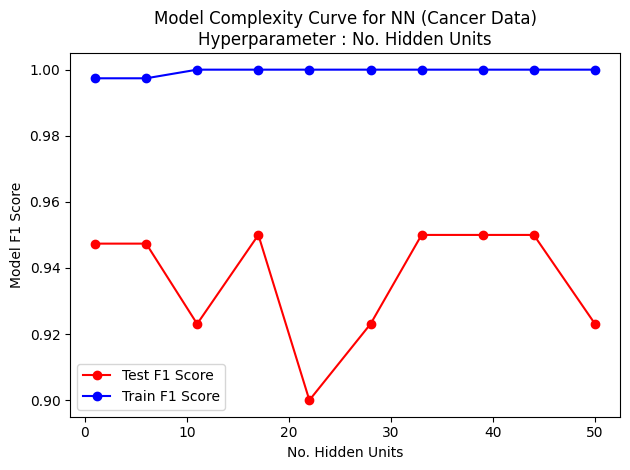

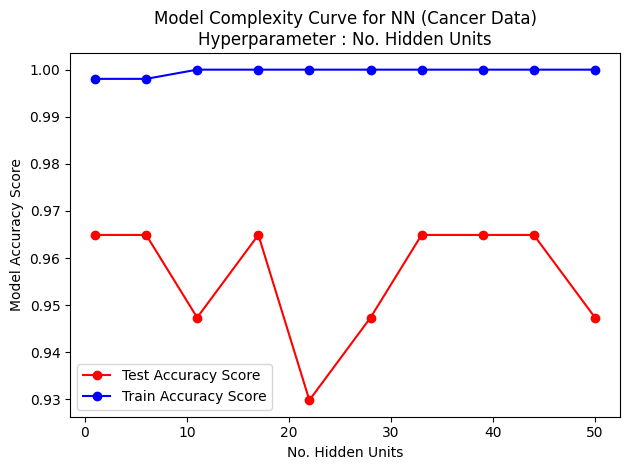

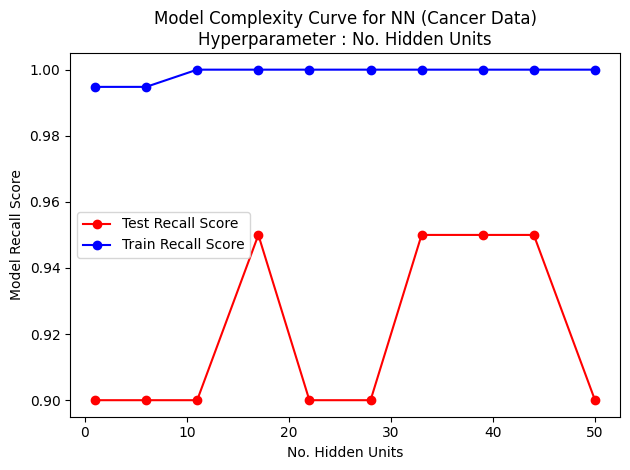

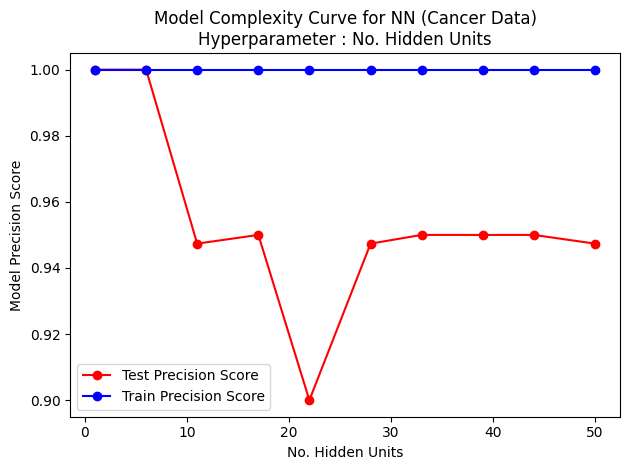

In [17]:
Xtrain,Xtest,ytrain,ytest = train_test_split(cX,cY,test_size=.10,random_state=25)
f1_test = []
f1_train = []
accuracy_test = []
accuracy_train = []
precision_test = []
precision_train = []
recall_test = []
recall_train = []

hlist = np.linspace(1,50,10).astype('int')
for i in hlist:
        
        mlp = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='logistic', 
                                learning_rate_init=0.1, max_iter=300, random_state=25,verbose=True)
        mlp.fit(Xtrain, ytrain)
        ypredtest = mlp.predict(Xtest)
        ypredtrain = mlp.predict(Xtrain)
        f1_test.append(f1_score(ytest, ypredtest))
        f1_train.append(f1_score(ytrain, ypredtrain))
        accuracy_test.append(accuracy_score(ytest, ypredtest))
        accuracy_train.append(accuracy_score(ytrain, ypredtrain))
        recall_test.append(recall_score(ytest, ypredtest))
        recall_train.append(recall_score(ytrain, ypredtrain))
        precision_test.append(precision_score(ytest, ypredtest))
        precision_train.append(precision_score(ytrain, ypredtrain))

plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
plt.ylabel('Model F1 Score')
plt.xlabel('No. Hidden Units')
title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Units"    
plt.title(title)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

plt.plot(hlist, accuracy_test, 'o-', color='r', label='Test Accuracy Score')
plt.plot(hlist, accuracy_train, 'o-', color = 'b', label='Train Accuracy Score')
plt.ylabel('Model Accuracy Score')
plt.xlabel('No. Hidden Units')
title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Units"    
plt.title(title)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

plt.plot(hlist, recall_test, 'o-', color='r', label='Test Recall Score')
plt.plot(hlist, recall_train, 'o-', color = 'b', label='Train Recall Score')
plt.ylabel('Model Recall Score')
plt.xlabel('No. Hidden Units')
title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Units"    
plt.title(title)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

plt.plot(hlist, precision_test, 'o-', color='r', label='Test Precision Score')
plt.plot(hlist, precision_train, 'o-', color = 'b', label='Train Precision Score')
plt.ylabel('Model Precision Score')
plt.xlabel('No. Hidden Units')
title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Units"    
plt.title(title)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Hidden Layers

In [7]:
def hidden_layer_configs(X,Y):
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=.10,random_state=25)
    f1_test = []
    f1_train = []
    accuracy_test = []
    accuracy_train = []
    precision_test = []
    precision_train = []
    recall_test = []
    recall_train = []
    hidden_layer_configs = [(10,) * i for i in range(1, 10)]
    lengths = list(range(1, 10))

    for hidden_layer_configs in hidden_layer_configs:
        print(f"Training with hidden layer configuration: {hidden_layer_configs}")
        mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_configs, 
        solver='adam', 
        activation='logistic', 
        learning_rate_init=0.1, 
        max_iter=300, 
        random_state=25,
        verbose=True)
    
        mlp.fit(Xtrain,ytrain)
        ypredtest = mlp.predict(Xtest)
        ypredtrain = mlp.predict(Xtrain)
        f1_test.append(f1_score(ytest, ypredtest))
        f1_train.append(f1_score(ytrain, ypredtrain))
        accuracy_test.append(accuracy_score(ytest, ypredtest))
        accuracy_train.append(accuracy_score(ytrain, ypredtrain))
        recall_test.append(recall_score(ytest, ypredtest))
        recall_train.append(recall_score(ytrain, ypredtrain))
        precision_test.append(precision_score(ytest, ypredtest))
        precision_train.append(precision_score(ytrain, ypredtrain))
    
# Convert the list to a NumPy array
    
    plt.plot(lengths, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(lengths, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Hidden Layers')
    title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Layers"    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    plt.plot(lengths, accuracy_test, 'o-', color='r', label='Test Accuracy Score')
    plt.plot(lengths, accuracy_train, 'o-', color = 'b', label='Train Accuracy Score')
    plt.ylabel('Model Accuracy Score')
    plt.xlabel('No. Hidden Layers')
    title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Layers"    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    plt.plot(lengths, recall_test, 'o-', color='r', label='Test Recall Score')
    plt.plot(lengths, recall_train, 'o-', color = 'b', label='Train Recall Score')
    plt.ylabel('Model Recall Score')
    plt.xlabel('No. Hidden Layers')
    title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Layers"    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    plt.plot(lengths, precision_test, 'o-', color='r', label='Test Precision Score')
    plt.plot(lengths, precision_train, 'o-', color = 'b', label='Train Precision Score')
    plt.ylabel('Model Precision Score')
    plt.xlabel('No. Hidden Layers')
    title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Layers"    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

Training with hidden layer configuration: (10,)
Iteration 1, loss = 0.20380984
Iteration 2, loss = 0.18819616
Iteration 3, loss = 0.18812214
Iteration 4, loss = 0.18646740
Iteration 5, loss = 0.18550346
Iteration 6, loss = 0.18477573
Iteration 7, loss = 0.18468991
Iteration 8, loss = 0.18334848
Iteration 9, loss = 0.18309362
Iteration 10, loss = 0.18193714
Iteration 11, loss = 0.18237573
Iteration 12, loss = 0.18266916
Iteration 13, loss = 0.18186322
Iteration 14, loss = 0.18093579
Iteration 15, loss = 0.18197480
Iteration 16, loss = 0.18229358
Iteration 17, loss = 0.18141564
Iteration 18, loss = 0.18200757
Iteration 19, loss = 0.18246776
Iteration 20, loss = 0.18398419
Iteration 21, loss = 0.18176043
Iteration 22, loss = 0.18288279
Iteration 23, loss = 0.18350696
Iteration 24, loss = 0.18400161
Iteration 25, loss = 0.18242342
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training with hidden layer configuration: (10, 10)
Iteration 1, loss = 

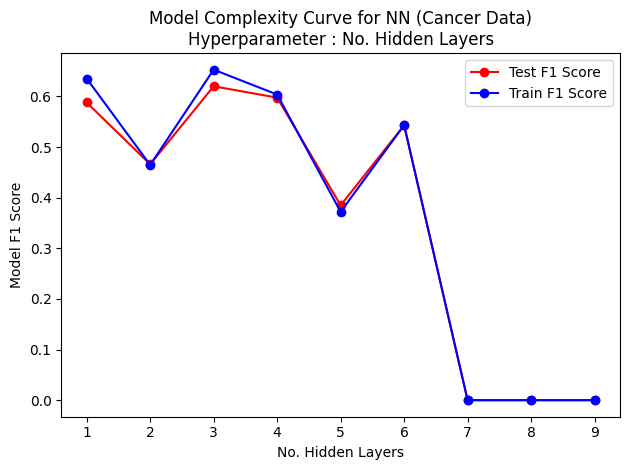

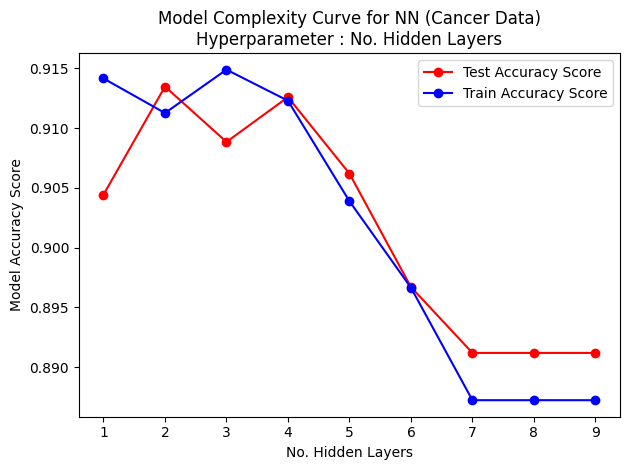

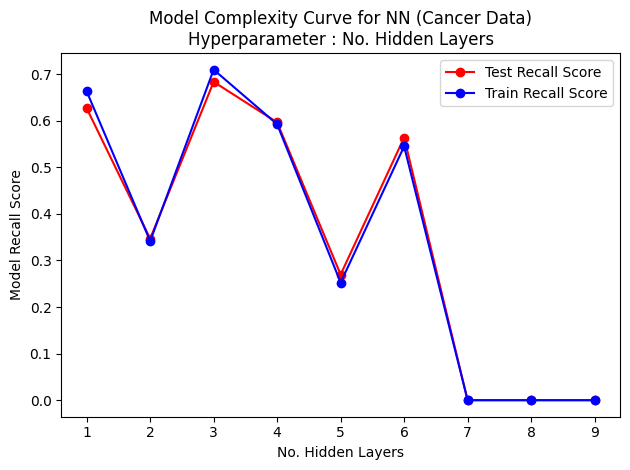

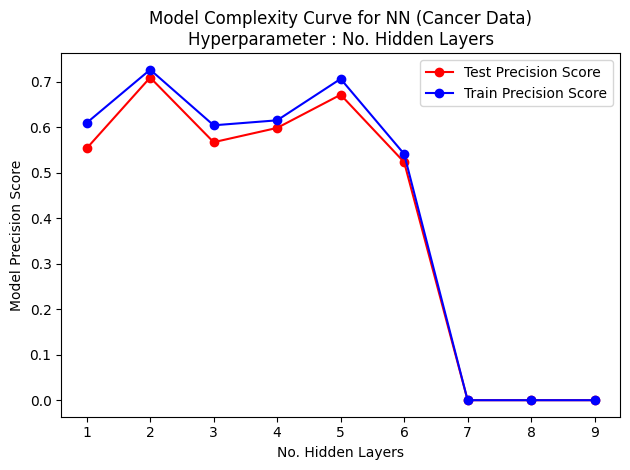

In [8]:
hidden_layer_configs(bmX,bmY)

Training with hidden layer configuration: (10,)
Iteration 1, loss = 0.54230141
Iteration 2, loss = 0.26075309
Iteration 3, loss = 0.13053072
Iteration 4, loss = 0.08271892
Iteration 5, loss = 0.06860898
Iteration 6, loss = 0.06374472
Iteration 7, loss = 0.06055713
Iteration 8, loss = 0.05789252
Iteration 9, loss = 0.05381898
Iteration 10, loss = 0.04751888
Iteration 11, loss = 0.04417035
Iteration 12, loss = 0.04065053
Iteration 13, loss = 0.03836293
Iteration 14, loss = 0.03480190
Iteration 15, loss = 0.03236109
Iteration 16, loss = 0.03042820
Iteration 17, loss = 0.02929688
Iteration 18, loss = 0.02789829
Iteration 19, loss = 0.02564707
Iteration 20, loss = 0.02455246
Iteration 21, loss = 0.02315240
Iteration 22, loss = 0.02255176
Iteration 23, loss = 0.02144621
Iteration 24, loss = 0.02032849
Iteration 25, loss = 0.01935329
Iteration 26, loss = 0.01867322
Iteration 27, loss = 0.01762270
Iteration 28, loss = 0.01692960
Iteration 29, loss = 0.01624767
Iteration 30, loss = 0.01550851
I

Iteration 1, loss = 0.73448422
Iteration 2, loss = 0.68041847
Iteration 3, loss = 0.61070839
Iteration 4, loss = 0.49756112
Iteration 5, loss = 0.36616878
Iteration 6, loss = 0.25127412
Iteration 7, loss = 0.17119528
Iteration 8, loss = 0.13614419
Iteration 9, loss = 0.10475111
Iteration 10, loss = 0.08556389
Iteration 11, loss = 0.08874216
Iteration 12, loss = 0.07603305
Iteration 13, loss = 0.07341535
Iteration 14, loss = 0.07034414
Iteration 15, loss = 0.06410730
Iteration 16, loss = 0.05879053
Iteration 17, loss = 0.05569901
Iteration 18, loss = 0.05303429
Iteration 19, loss = 0.04921702
Iteration 20, loss = 0.04512657
Iteration 21, loss = 0.03903431
Iteration 22, loss = 0.03847537
Iteration 23, loss = 0.03666047
Iteration 24, loss = 0.03548486
Iteration 25, loss = 0.03532933
Iteration 26, loss = 0.03520148
Iteration 27, loss = 0.03511868
Iteration 28, loss = 0.03498471
Iteration 29, loss = 0.03487580
Iteration 30, loss = 0.03468834
Iteration 31, loss = 0.03459120
Iteration 32, los

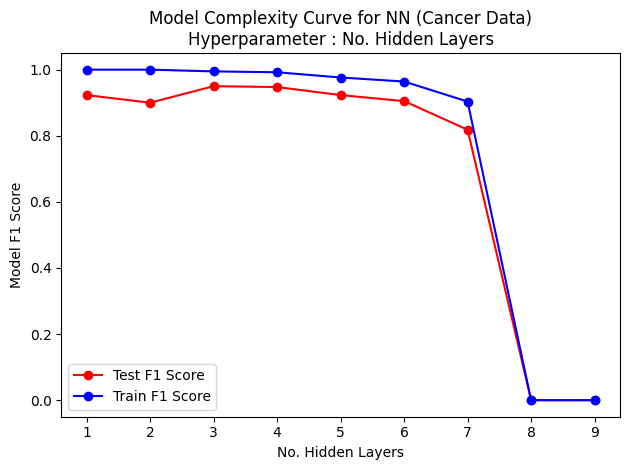

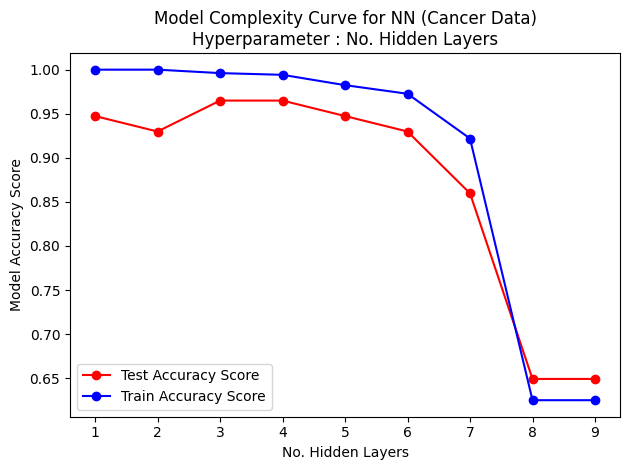

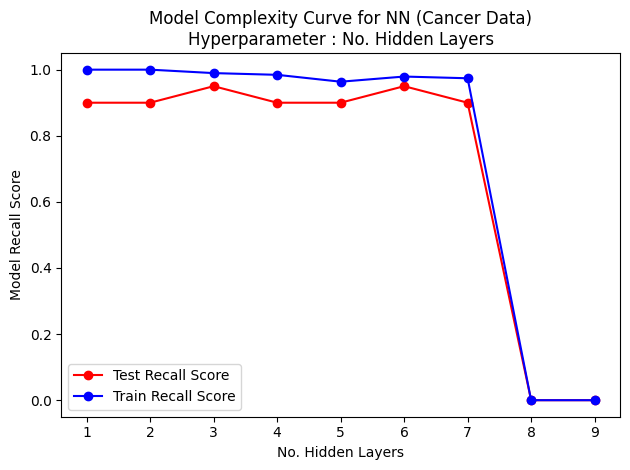

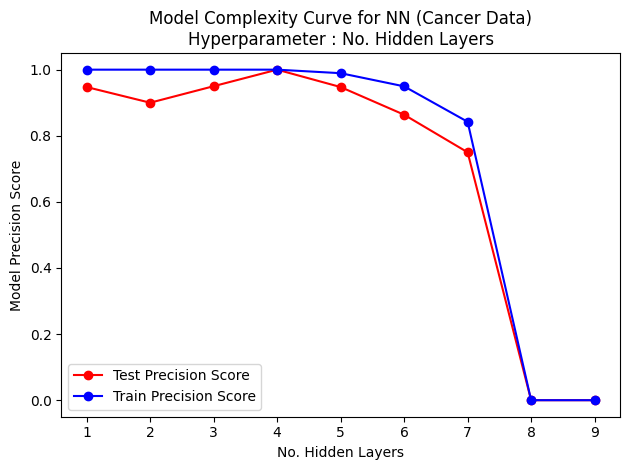

In [9]:
hidden_layer_configs(cX,cY)

In [28]:
def alpha(X,Y):
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=.10,random_state=25)
    f1_test = []
    f1_train = []
    accuracy_test = []
    accuracy_train = []
    precision_test = []
    precision_train = []
    recall_test = []
    recall_train = []
    lr_alpha = np.linspace(0.001, 0.5, 50)
    

    for i in lr_alpha:
        print(f"Training with hidden layer configuration: {hidden_layer_configs}")
        mlp = MLPClassifier(
        hidden_layer_sizes=(10,), 
        solver='adam', 
        activation='logistic', 
        learning_rate_init=i, 
        max_iter=300, 
        random_state=25,
        verbose=True)
    
        mlp.fit(Xtrain,ytrain)
        ypredtest = mlp.predict(Xtest)
        ypredtrain = mlp.predict(Xtrain)
        f1_test.append(f1_score(ytest, ypredtest))
        f1_train.append(f1_score(ytrain, ypredtrain))
        accuracy_test.append(accuracy_score(ytest, ypredtest))
        accuracy_train.append(accuracy_score(ytrain, ypredtrain))
        recall_test.append(recall_score(ytest, ypredtest))
        recall_train.append(recall_score(ytrain, ypredtrain))
        precision_test.append(precision_score(ytest, ypredtest))
        precision_train.append(precision_score(ytrain, ypredtrain))
    
# Convert the list to a NumPy array
    
    plt.plot(lr_alpha, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(lr_alpha, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('learning rate')
    title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : Alpha"    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    plt.plot(lr_alpha, accuracy_test, 'o-', color='r', label='Test Accuracy Score')
    plt.plot(lr_alpha, accuracy_train, 'o-', color = 'b', label='Train Accuracy Score')
    plt.ylabel('Model Accuracy Score')
    plt.xlabel('learning rate')
    title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : Alpha"    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    # plt.plot(lengths, recall_test, 'o-', color='r', label='Test Recall Score')
    # plt.plot(lengths, recall_train, 'o-', color = 'b', label='Train Recall Score')
    # plt.ylabel('Model Recall Score')
    # plt.xlabel('No. Hidden Layers')
    # title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Layers"    
    # plt.title(title)
    # plt.legend(loc='best')
    # plt.tight_layout()
    # plt.show()

    # plt.plot(lengths, precision_test, 'o-', color='r', label='Test Precision Score')
    # plt.plot(lengths, precision_train, 'o-', color = 'b', label='Train Precision Score')
    # plt.ylabel('Model Precision Score')
    # plt.xlabel('No. Hidden Layers')
    # title="Model Complexity Curve for NN (Cancer Data)\nHyperparameter : No. Hidden Layers"    
    # plt.title(title)
    # plt.legend(loc='best')
    # plt.tight_layout()
    # plt.show()

Training with hidden layer configuration: <function hidden_layer_configs at 0x7afc1ef756c0>
Iteration 1, loss = 0.39452878
Iteration 2, loss = 0.28787961


Iteration 3, loss = 0.25700678
Iteration 4, loss = 0.23339605
Iteration 5, loss = 0.21675863
Iteration 6, loss = 0.20622895
Iteration 7, loss = 0.19987425
Iteration 8, loss = 0.19607449
Iteration 9, loss = 0.19383611
Iteration 10, loss = 0.19238257
Iteration 11, loss = 0.19146396
Iteration 12, loss = 0.19078476
Iteration 13, loss = 0.19013120
Iteration 14, loss = 0.18966145
Iteration 15, loss = 0.18930636
Iteration 16, loss = 0.18887570
Iteration 17, loss = 0.18852736
Iteration 18, loss = 0.18822268
Iteration 19, loss = 0.18784275
Iteration 20, loss = 0.18745905
Iteration 21, loss = 0.18709873
Iteration 22, loss = 0.18664755
Iteration 23, loss = 0.18630039
Iteration 24, loss = 0.18592914
Iteration 25, loss = 0.18558763
Iteration 26, loss = 0.18522253
Iteration 27, loss = 0.18483859
Iteration 28, loss = 0.18453318
Iteration 29, loss = 0.18415314
Iteration 30, loss = 0.18389015
Iteration 31, loss = 0.18356716
Iteration 32, loss = 0.18326002
Iteration 33, loss = 0.18292634
Iteration 34, l

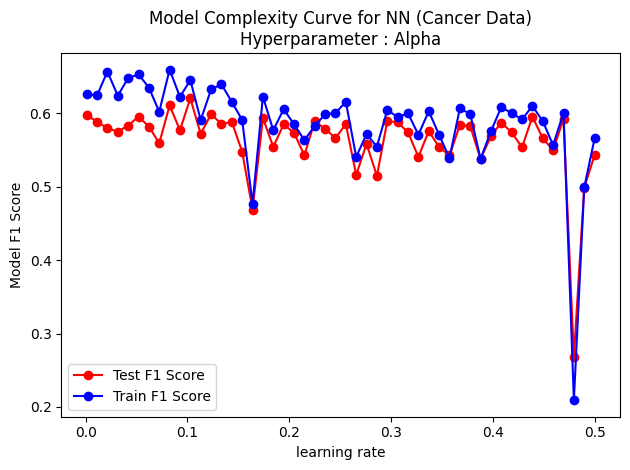

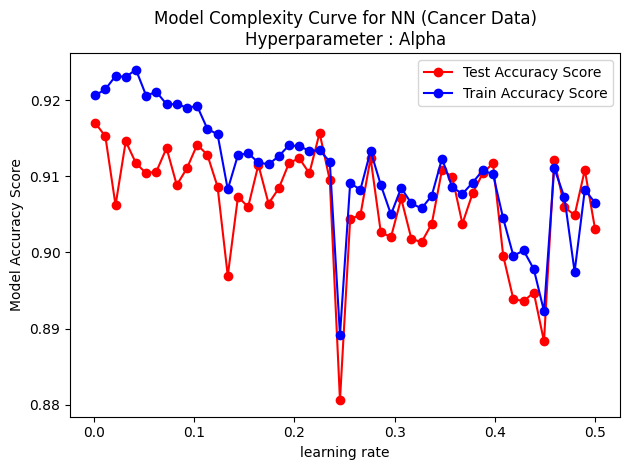

In [29]:
alpha(bmX,bmY)

Training with hidden layer configuration: <function hidden_layer_configs at 0x7afc1ef756c0>
Iteration 1, loss = 0.66812021
Iteration 2, loss = 0.65976747
Iteration 3, loss = 0.65168537
Iteration 4, loss = 0.64361695
Iteration 5, loss = 0.63579411
Iteration 6, loss = 0.62791677
Iteration 7, loss = 0.62029270
Iteration 8, loss = 0.61271947
Iteration 9, loss = 0.60532734
Iteration 10, loss = 0.59794598
Iteration 11, loss = 0.59064308
Iteration 12, loss = 0.58369658
Iteration 13, loss = 0.57658408
Iteration 14, loss = 0.56961227
Iteration 15, loss = 0.56285896
Iteration 16, loss = 0.55607611
Iteration 17, loss = 0.54941675
Iteration 18, loss = 0.54279066
Iteration 19, loss = 0.53623369
Iteration 20, loss = 0.52988308
Iteration 21, loss = 0.52354272
Iteration 22, loss = 0.51719988
Iteration 23, loss = 0.51090220
Iteration 24, loss = 0.50465805
Iteration 25, loss = 0.49854167
Iteration 26, loss = 0.49251518
Iteration 27, loss = 0.48636859
Iteration 28, loss = 0.48031237
Iteration 29, loss = 

Iteration 120, loss = 0.01869399
Iteration 121, loss = 0.01851838
Iteration 122, loss = 0.01833829
Iteration 123, loss = 0.01815550
Iteration 124, loss = 0.01813266
Iteration 125, loss = 0.01797579
Iteration 126, loss = 0.01808837
Iteration 127, loss = 0.01768314
Iteration 128, loss = 0.01779366
Iteration 129, loss = 0.01768485
Iteration 130, loss = 0.01764882
Iteration 131, loss = 0.01701234
Iteration 132, loss = 0.01689926
Iteration 133, loss = 0.01673429
Iteration 134, loss = 0.01681755
Iteration 135, loss = 0.01659946
Iteration 136, loss = 0.01633992
Iteration 137, loss = 0.01617839
Iteration 138, loss = 0.01653792
Iteration 139, loss = 0.01633638
Iteration 140, loss = 0.01586490
Iteration 141, loss = 0.01574775
Iteration 142, loss = 0.01599065
Iteration 143, loss = 0.01558929
Iteration 144, loss = 0.01556716
Iteration 145, loss = 0.01527470
Iteration 146, loss = 0.01518202
Iteration 147, loss = 0.01491727
Iteration 148, loss = 0.01482313
Iteration 149, loss = 0.01502163
Iteration 

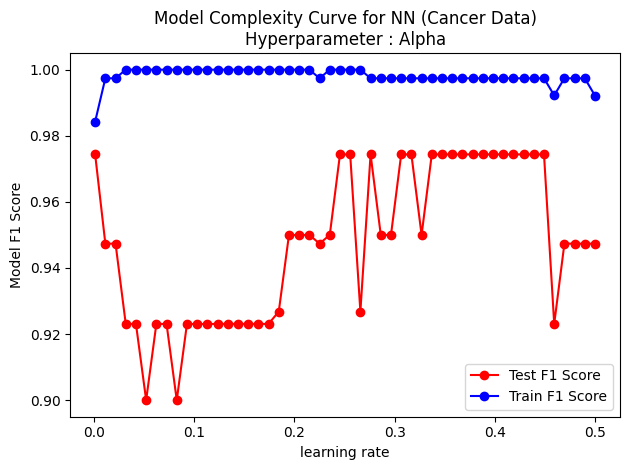

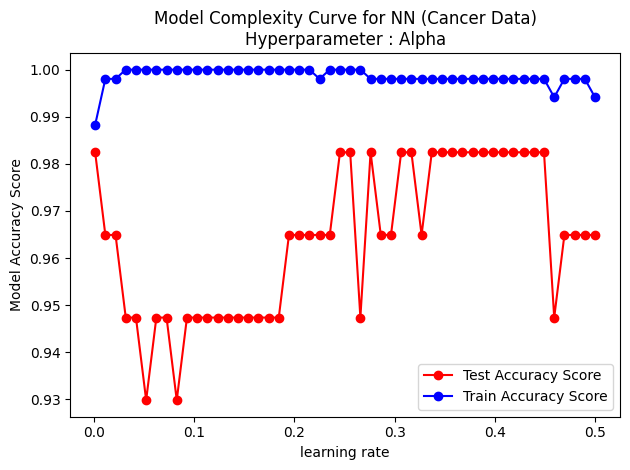

In [30]:
alpha(cX,cY)

logistic


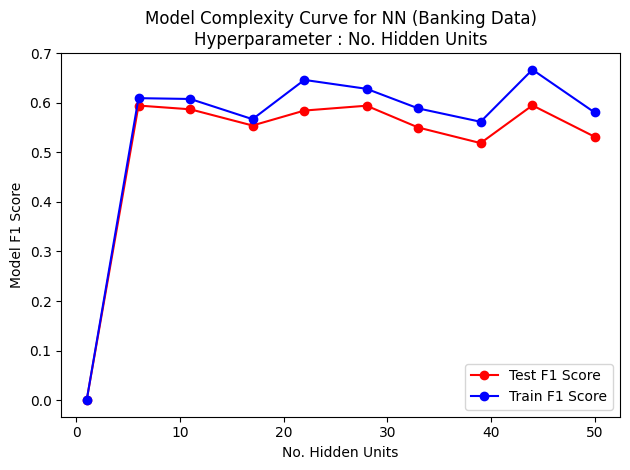

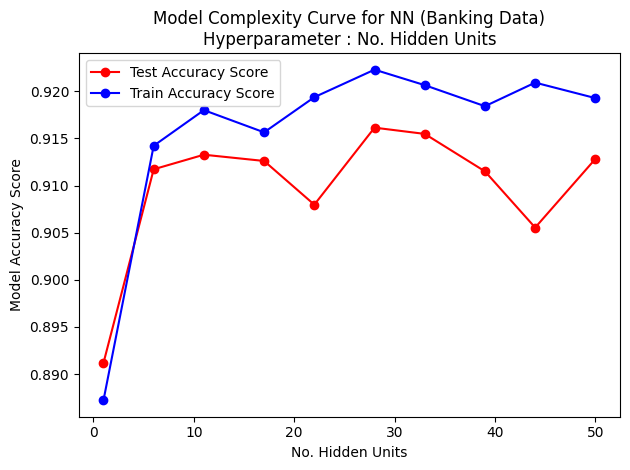

tanh


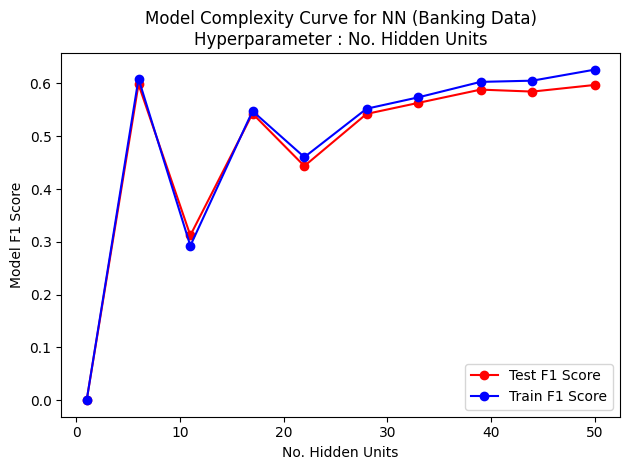

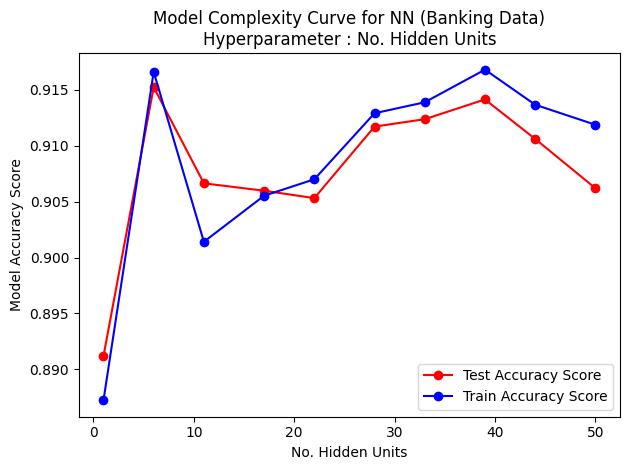

relu


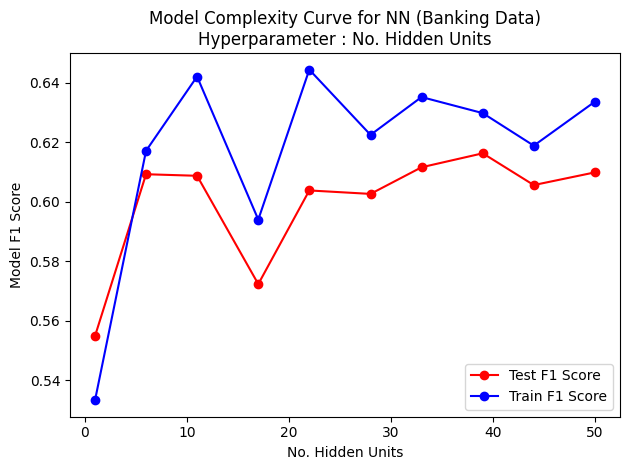

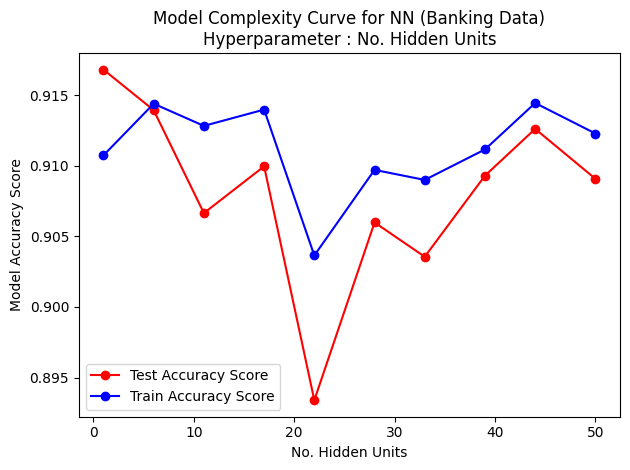

In [13]:
Xtrain,Xtest,ytrain,ytest = train_test_split(bmX,bmY,test_size=.10,random_state=25)
f1_test = []
f1_train = []
accuracy_test = []
accuracy_train = []
precision_test = []
precision_train = []
recall_test = []
recall_train = []
activation_lr = ['logistic','tanh','relu']

for k in activation_lr:
    f1_test = []
    f1_train = []
    accuracy_test = []
    accuracy_train = []
    precision_test = []
    precision_train = []
    recall_test = []
    recall_train = []
        
    hlist = np.linspace(1,50,10).astype('int')
    for i in hlist:
        
            mlp = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation=k, 
                                learning_rate_init=0.1, max_iter=300, random_state=25)
            mlp.fit(Xtrain, ytrain)
            ypredtest = mlp.predict(Xtest)
            ypredtrain = mlp.predict(Xtrain)
            f1_test.append(f1_score(ytest, ypredtest))
            f1_train.append(f1_score(ytrain, ypredtrain))
            accuracy_test.append(accuracy_score(ytest, ypredtest))
            accuracy_train.append(accuracy_score(ytrain, ypredtrain))
            recall_test.append(recall_score(ytest, ypredtest))
            recall_train.append(recall_score(ytrain, ypredtrain))
            precision_test.append(precision_score(ytest, ypredtest))
            precision_train.append(precision_score(ytrain, ypredtrain))

    print(k)
    plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Hidden Units')
    title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    plt.plot(hlist, accuracy_test, 'o-', color='r', label='Test Accuracy Score')
    plt.plot(hlist, accuracy_train, 'o-', color = 'b', label='Train Accuracy Score')
    plt.ylabel('Model Accuracy Score')
    plt.xlabel('No. Hidden Units')
    title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


logistic


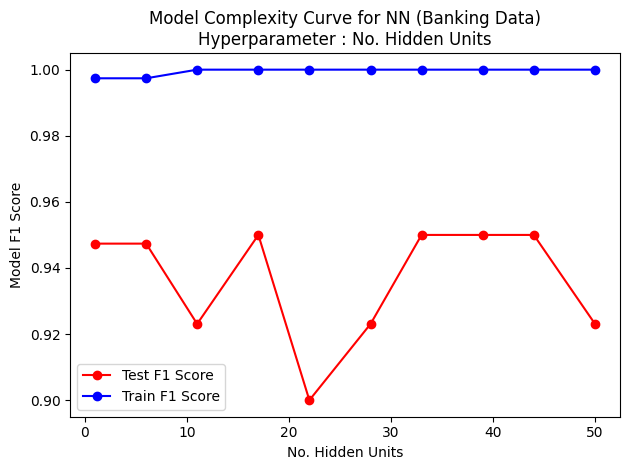

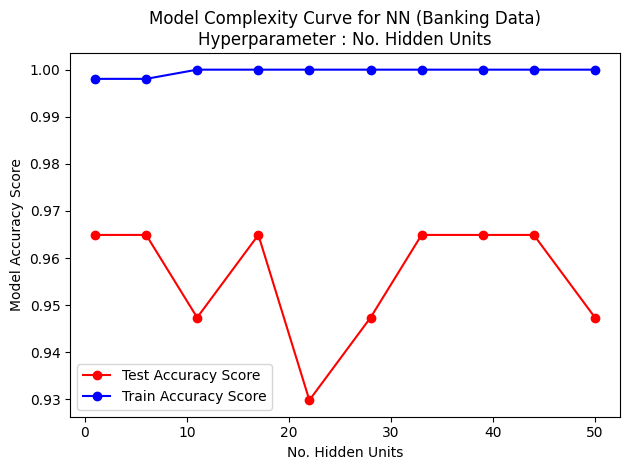

tanh


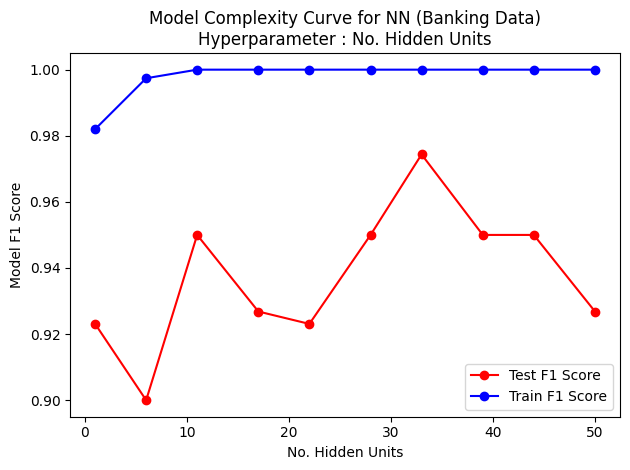

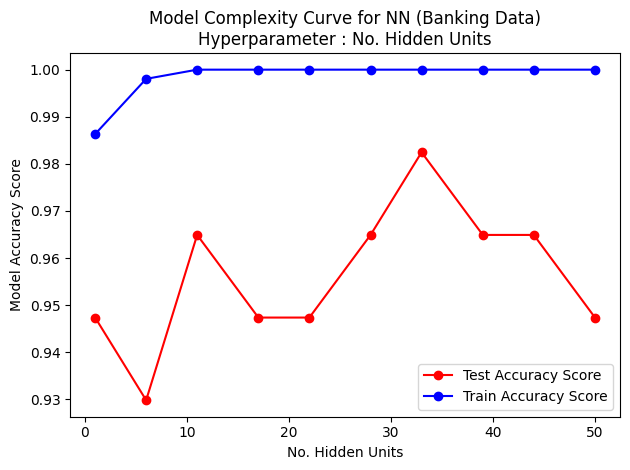

relu


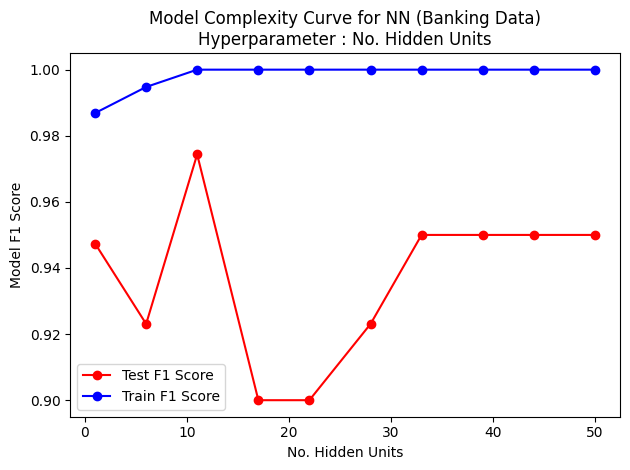

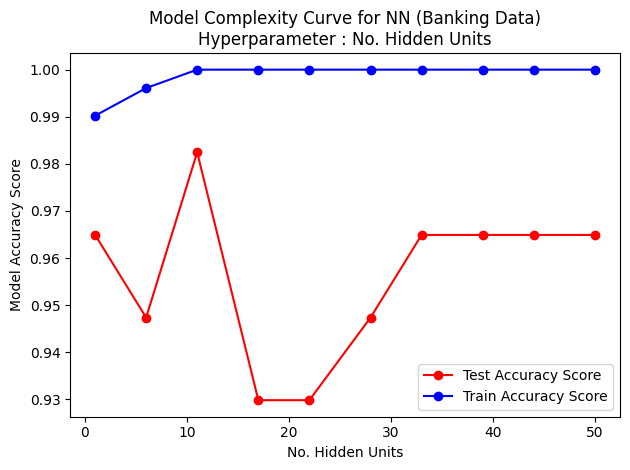

In [14]:
Xtrain,Xtest,ytrain,ytest = train_test_split(cX,cY,test_size=.10,random_state=25)
f1_test = []
f1_train = []
accuracy_test = []
accuracy_train = []
precision_test = []
precision_train = []
recall_test = []
recall_train = []
activation_lr = ['logistic','tanh','relu']

for k in activation_lr:
    f1_test = []
    f1_train = []
    accuracy_test = []
    accuracy_train = []
    precision_test = []
    precision_train = []
    recall_test = []
    recall_train = []
        
    hlist = np.linspace(1,50,10).astype('int')
    for i in hlist:
        
            mlp = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation=k, 
                                learning_rate_init=0.1, max_iter=300, random_state=25)
            mlp.fit(Xtrain, ytrain)
            ypredtest = mlp.predict(Xtest)
            ypredtrain = mlp.predict(Xtrain)
            f1_test.append(f1_score(ytest, ypredtest))
            f1_train.append(f1_score(ytrain, ypredtrain))
            accuracy_test.append(accuracy_score(ytest, ypredtest))
            accuracy_train.append(accuracy_score(ytrain, ypredtrain))
            recall_test.append(recall_score(ytest, ypredtest))
            recall_train.append(recall_score(ytrain, ypredtrain))
            precision_test.append(precision_score(ytest, ypredtest))
            precision_train.append(precision_score(ytrain, ypredtrain))

    print(k)
    plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Hidden Units')
    title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    plt.plot(hlist, accuracy_test, 'o-', color='r', label='Test Accuracy Score')
    plt.plot(hlist, accuracy_train, 'o-', color = 'b', label='Train Accuracy Score')
    plt.ylabel('Model Accuracy Score')
    plt.xlabel('No. Hidden Units')
    title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units"    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [33]:
bmX.shape[1]

57

In [34]:
from skorch.callbacks import Callback
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, make_scorer
from skorch.callbacks import EpochScoring,EarlyStopping


def get_activation_fn(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'sigmoid':
        return nn.Sigmoid()
    elif name == 'tanh':
        return nn.Tanh()
    elif name == 'leaky_relu':
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Unknown activation function: {name}")
    
#f1_scorer = make_scorer(f1_with_zero_division, greater_is_better=True)
# precision_scorer = make_scorer(precision_with_zero_division, greater_is_better=True)

# precision_callback = EpochScoring(
#     scoring=precision_scorer,
#     name='precision',
#     lower_is_better=False
# )

# def recall_with_zero_division(y_true, y_pred):
#     return recall_score(y_true, y_pred, zero_division=1)

#def f1_with_zero_division(y_true, y_pred):
#    return f1_score(y_true, y_pred)


# precision_callback = EpochScoring(
#     scoring=precision_with_zero_division,
#     name='precision',
#     lower_is_better=False
# )

# recall_callback = EpochScoring(
#     scoring=recall_with_zero_division,
#     name='recall',
#     lower_is_better=False
# )

#f1_callback = EpochScoring(
#    scoring=f1_with_zero_division,
#    name='f1',
#    #lower_is_better=False
#)
    
activation_fn_name = 'sigmoid'
activation_fn = get_activation_fn(activation_fn_name)
auc = EpochScoring(scoring='roc_auc', lower_is_better=False,on_train=True)
precision = EpochScoring(scoring='precision', lower_is_better=False, on_train=True)
recall = EpochScoring(scoring='recall', lower_is_better=False, on_train=True)

net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=bmX.shape[1],
    module__output_dim=2,
    module__hidden_units=1,
    module__hidden_layers=1,
    module__activation=activation_fn,
    module__dropout_percent=0,
    max_epochs=200,
    verbose=1,
    callbacks=[#EpochScoring(scoring='precision', name='train_precision', on_train=True),
               
               EpochScoring(scoring='accuracy', name='train_acc', on_train=True),
               EarlyStopping(monitor='valid_loss', patience=10),
               #f1_callback,
               
               ],
    criterion=nn.CrossEntropyLoss,
    #criterion__weight=class_weights,
    optimizer=optim.SGD,
    lr=.05,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
net.fit(bmX,bmY)
#y_proba = net.predict_proba(X2.values.astype(np.float32))
       


  epoch    train_acc    train_loss    valid_acc    valid_loss     dur
-------  -----------  ------------  -----------  ------------  ------
      1       0.8819        0.5015       0.8877        0.4520  0.9913
      2       0.8876        0.4440       0.8877        0.4388  0.5274
      3       0.8876        0.4363       0.8877        0.4344  0.6677
      4       0.8876        0.4332       0.8877        0.4321  0.5616
      5       0.8876        0.4314       0.8877        0.4308  0.5164
      6       0.8876        0.4303       0.8877        0.4299  0.6284
      7       0.8876        0.4296       0.8877        0.4293  0.5739
      8       0.8876        0.4290       0.8877        0.4288  0.5407
      9       0.8876        0.4286       0.8877        0.4284  0.5426
     10       0.8876        0.4283       0.8877        0.4281  0.5538
     11       0.8876        0.4280       0.8877        0.4279  0.6223
     12       0.8876        0.4278       0.8877        0.4277  0.5129
     13       0.8876

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=BackpropModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): Sigmoid()
    (output_activation): Softmax(dim=-1)
    (layers): ModuleList(
      (0): Linear(in_features=57, out_features=1, bias=True)
      (1): Linear(in_features=1, out_features=1, bias=True)
      (2): Linear(in_features=1, out_features=2, bias=True)
    )
  ),
)

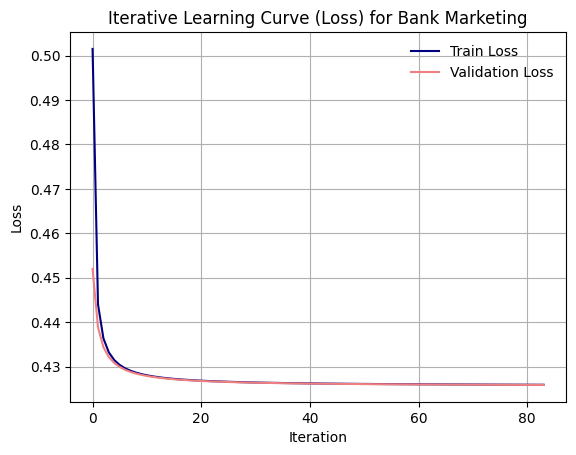

In [36]:
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss) for Bank Marketing")
plt.grid(visible=True)
plt.legend(frameon=False)

In [38]:
from skorch.callbacks import Callback
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, make_scorer
from skorch.callbacks import EpochScoring,EarlyStopping


def get_activation_fn(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'sigmoid':
        return nn.Sigmoid()
    elif name == 'tanh':
        return nn.Tanh()
    elif name == 'leaky_relu':
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Unknown activation function: {name}")
    
#f1_scorer = make_scorer(f1_with_zero_division, greater_is_better=True)
# precision_scorer = make_scorer(precision_with_zero_division, greater_is_better=True)

# precision_callback = EpochScoring(
#     scoring=precision_scorer,
#     name='precision',
#     lower_is_better=False
# )

# def recall_with_zero_division(y_true, y_pred):
#     return recall_score(y_true, y_pred, zero_division=1)

#def f1_with_zero_division(y_true, y_pred):
#    return f1_score(y_true, y_pred)


# precision_callback = EpochScoring(
#     scoring=precision_with_zero_division,
#     name='precision',
#     lower_is_better=False
# )

# recall_callback = EpochScoring(
#     scoring=recall_with_zero_division,
#     name='recall',
#     lower_is_better=False
# )

#f1_callback = EpochScoring(
#    scoring=f1_with_zero_division,
#    name='f1',
#    #lower_is_better=False
#)
    
activation_fn_name = 'sigmoid'
activation_fn = get_activation_fn(activation_fn_name)
auc = EpochScoring(scoring='roc_auc', lower_is_better=False,on_train=True)
precision = EpochScoring(scoring='precision', lower_is_better=False, on_train=True)
recall = EpochScoring(scoring='recall', lower_is_better=False, on_train=True)

net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=cX.shape[1],
    module__output_dim=2,
    module__hidden_units=1,
    module__hidden_layers=1,
    module__activation=activation_fn,
    module__dropout_percent=0,
    max_epochs=200,
    verbose=1,
    callbacks=[#EpochScoring(scoring='precision', name='train_precision', on_train=True),
               
               EpochScoring(scoring='accuracy', name='train_acc', on_train=True),
               EarlyStopping(monitor='valid_loss', patience=10),
               #f1_callback,
               
               ],
    criterion=nn.CrossEntropyLoss,
    #criterion__weight=class_weights,
    optimizer=optim.SGD,
    lr=.05,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
net.fit(cX,cY)
#y_proba = net.predict_proba(X2.values.astype(np.float32))

  epoch    train_acc    train_loss    valid_acc    valid_loss     dur
-------  -----------  ------------  -----------  ------------  ------
      1       0.3714        0.7522       0.3772        0.7470  0.0086
      2       0.3714        0.7473       0.3772        0.7426  0.0083
      3       0.3714        0.7429       0.3772        0.7381  0.0081
      4       0.3714        0.7382       0.3772        0.7335  0.0075
      5       0.3714        0.7335       0.3772        0.7292  0.0068
      6       0.3714        0.7292       0.3772        0.7251  0.0067
      7       0.3714        0.7250       0.3772        0.7213  0.0097
      8       0.3714        0.7211       0.3772        0.7173  0.0106
      9       0.3714        0.7171       0.3772        0.7138  0.0105
     10       0.3714        0.7135       0.3772        0.7104  0.0103
     11       0.3714        0.7101       0.3772        0.7072  0.0105
     12       0.3714        0.7068       0.3772        0.7042  0.0107
     13       0.3714


    135       0.6286        0.6586       0.6228        0.6615  0.0345
    136       0.6286        0.6586       0.6228        0.6615  0.0142
    137       0.6286        0.6586       0.6228        0.6615  0.0141
    138       0.6286        0.6586       0.6228        0.6615  0.0098
    139       0.6286        0.6586       0.6228        0.6615  0.0069
    140       0.6286        0.6586       0.6228        0.6615  0.0071
    141       0.6286        0.6585       0.6228        0.6615  0.0071
    142       0.6286        0.6585       0.6228        0.6615  0.0069
    143       0.6286        0.6585       0.6228        0.6615  0.0102
    144       0.6286        0.6585       0.6228        0.6615  0.0070
    145       0.6286        0.6585       0.6228        0.6614  0.0070
    146       0.6286        0.6585       0.6228        0.6614  0.0070
    147       0.6286        0.6585       0.6228        0.6614  0.0070
    148       0.6286        0.6585       0.6228        0.6614  0.0069
    149       0.628

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=BackpropModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): Sigmoid()
    (output_activation): Softmax(dim=-1)
    (layers): ModuleList(
      (0): Linear(in_features=29, out_features=1, bias=True)
      (1): Linear(in_features=1, out_features=1, bias=True)
      (2): Linear(in_features=1, out_features=2, bias=True)
    )
  ),
)

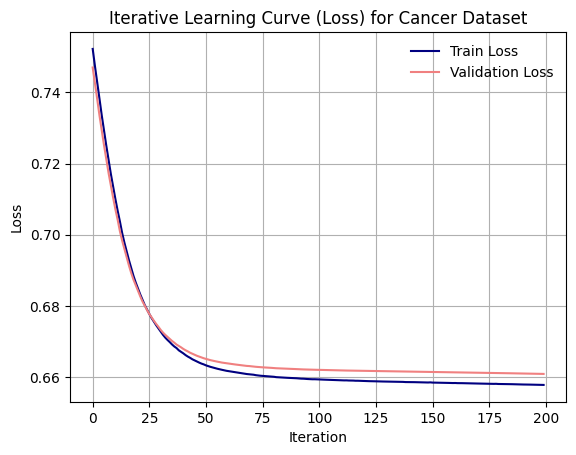

In [39]:
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss) for Cancer Dataset")
plt.grid(visible=True)
plt.legend(frameon=False)

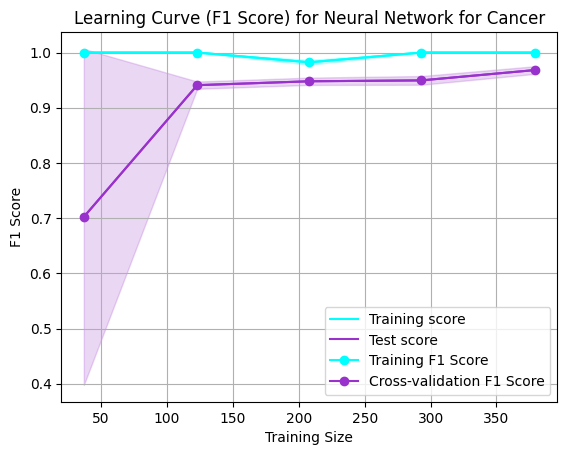

In [43]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, f1_score

net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Create a custom scorer using F1 score
f1_scorer = make_scorer(f1_score, average='macro')


# Plot the learning curve


train_sizes, train_scores, test_scores = learning_curve(
    net, cX, cY, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring=f1_scorer
)



train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, label="Training score", color='cyan')
plt.plot(train_sizes, test_scores_mean, label="Test score", color='darkorchid')
plt.title("Learning Curve")
plt.xlabel("Training size")
plt.ylabel("Score")
plt.grid(visible=True)
plt.legend(frameon=False)
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plotting the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, 'o-', color='cyan', label="Training F1 Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='darkorchid', label="Cross-validation F1 Score")
plt.title("Learning Curve (F1 Score) for Neural Network for Cancer")
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.grid(visible=True)
plt.legend(loc="best")
plt.show()

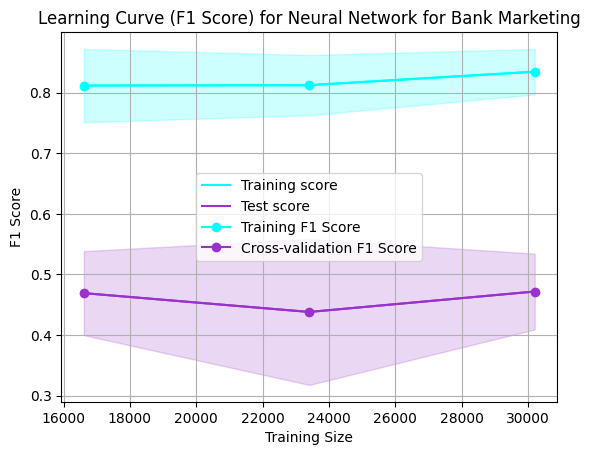

In [44]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, f1_score
import time

net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Create a custom scorer using F1 score
f1_scorer = make_scorer(f1_score, average='macro')

#train_start_time = time.time()
# Plot the learning curve


train_sizes, train_scores, test_scores = learning_curve(
    net, bmX, bmY, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring=f1_scorer
)



train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, label="Training score", color='cyan')
plt.plot(train_sizes, test_scores_mean, label="Test score", color='darkorchid')
plt.title("Learning Curve")
plt.xlabel("Training size")
plt.ylabel("Score")
plt.grid(visible=True)
plt.legend(frameon=False)
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plotting the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, 'o-', color='cyan', label="Training F1 Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='darkorchid', label="Cross-validation F1 Score")
plt.title("Learning Curve (F1 Score) for Neural Network for Bank Marketing")
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.grid(visible=True)
plt.legend(loc="best")
plt.show()

Above chart - Needs more love to as the the F1 Score is not imporving   

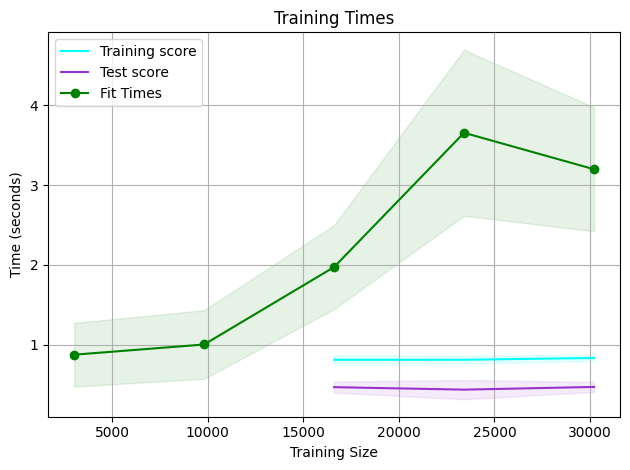

Total training duration: 32.85 seconds


In [ ]:
hidden_layer_sizes = (50,)  # Hidden layer configuration

X_train, X_test, y_train, y_test = train_test_split(bmX, bmY, test_size=0.10, random_state=25)
# Initialize the model
net = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Arrays to store training and testing times
train_times = []
test_times = []

# Measure the training and testing times
train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
train_sizes = train_sizes.astype(int)

for train_size in train_sizes:
    X_train_subset = X_train[:train_size]
    y_train_subset = y_train[:train_size]
    
    # Measure training time
    train_start_time = time.time()
    net.fit(X_train_subset, y_train_subset)
    train_end_time = time.time()
    
    train_duration = train_end_time - train_start_time
    train_times.append(train_duration)
    
    # Measure testing time
    test_start_time = time.time()
    net.predict(X_test)
    test_end_time = time.time()
    
    test_duration = test_end_time - test_start_time
    test_times.append(test_duration)

train_times = np.array(train_times)
test_times = np.array(test_times)

# Calculate mean and standard deviation for training times
train_times_mean = train_times.mean()
train_times_std = train_times.std()

# Calculate mean and standard deviation for testing times
test_times_mean = test_times.mean()
test_times_std = test_times.std()

# Plotting the training and testing times
plt.figure(figsize=(8, 6))

plt.fill_between(train_sizes, train_times - train_times_std,
                 train_times + train_times_std, alpha=0.1, color='green')
plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

plt.fill_between(train_sizes, test_times - test_times_std,
                 test_times + test_times_std, alpha=0.1, color='orange')
plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

plt.title("Training and Testing Times")
plt.xlabel("Training Size")
plt.ylabel("Time (seconds)")
plt.grid(visible=True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print(f"Average training duration: {train_times_mean:.4f} seconds")
print(f"Average test duration: {test_times_mean:.4f} seconds")